In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = read_csv('data-projeto-telecom/projeto4_telecom_treino.csv')

In [3]:
data.shape

(3333, 21)

In [4]:
data.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


#### Vamos checar a correlação entre as variaveis

In [5]:
corrMatrix = data.corr(method='pearson')

#### Vamos remover a coluna de ids

In [6]:
data = data.drop(data.columns[0], axis =1)

#### Vamos transformar as variáveis categóricas. Temos as variáveis state, area_code, international_plan, voicemail_plan, churn

In [7]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for feature in ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']:
    LE.fit(data[feature])
    data[feature] = LE.transform(data[feature])

In [8]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### Visualizações

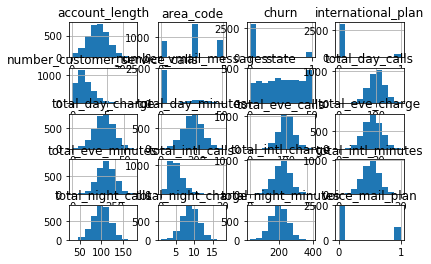

In [9]:
data.hist()
plt.show()

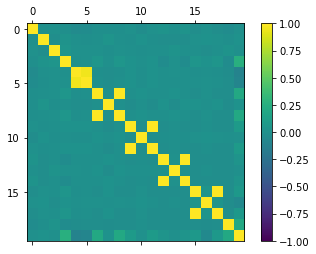

In [10]:
# Matriz de Correlação genérica
correlations = data.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

In [11]:
correlations

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,1.000000,0.003678,0.015430,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account_length,0.003678,1.000000,-0.014530,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,0.015430,-0.014530,1.000000,0.044033,0.009875,0.009077,0.010475,-0.007057,0.010478,0.000283,-0.002106,0.000304,0.007098,0.028307,0.007078,0.001549,-0.008069,0.001437,0.028250,0.003256
international_plan,-0.004597,0.024735,0.044033,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,-0.031664,0.002918,0.009875,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.027762,-0.004628,0.009077,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,-0.006737,0.006216,0.010475,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,-0.000764,0.038470,-0.007057,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,-0.006736,0.006214,0.010478,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,0.013682,-0.006757,0.000283,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


#### Podemos observar que as colunas total day minutes e total day charge tem correlação 1, e, de fato, o valor cobrado depende apenas do numero de minutos falado. Podemos remover uma destas colunas

In [12]:
data = data.drop('total_day_minutes', 1)

#### Da mesma forma, removemos a coluna total_night_minutes, total_intl_minutes e total_eve_minutes

In [13]:
data=data.drop('total_night_minutes', 1)

In [14]:
data = data.drop('total_intl_minutes', 1)

In [15]:
data = data.drop('total_eve_minutes', 1)

#### Ainda existem colunas com correlação acima de 0.9. Removeremos estas também para evitar de vez o problema da multicolinearidade. Iremos eliminar a coluna number_vmail_messages

In [16]:
data = data.drop('number_vmail_messages', 1)

#### Conseguimos eliminar a multicolinearidade

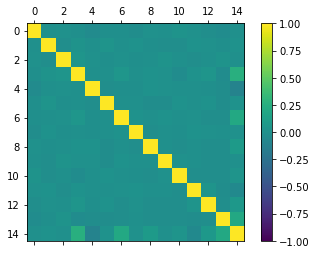

In [17]:
# Matriz de Correlação genérica
correlations = data.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

#### Agora devemos normalizar os dados. Como os dados não são muito esparsos, optaremos por utilizar o MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
X = data.values[:, 0:-1]
Y = data.values[:, -1]
scaler = MinMaxScaler(feature_range=(0,1))
normalizedX = scaler.fit_transform(X)

In [19]:
normalizedX.shape

(3333, 14)

#### Dividimos os dados em treino e teste

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(normalizedX, Y, test_size=0.33)

#### Agora vamos treinar o modelo

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

/home/newton/miniconda3/envs/BigData/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
model.score(X_test, Y_test)

0.8627272727272727

#### Agora vmos inserir as predições do arquivo de testes em um arquivo de resultados. Para isso, precisamos fazer o pré-processamento nestes dados

In [42]:
test_file = 'data-projeto-telecom/projeto4_telecom_teste.csv'
test_data = read_csv(test_file)
test_data_ids = test_data.iloc[:,0]
test_data = test_data.drop(test_data.columns[0], axis =1)
test_data.columns

#LE=LabelEncoder()
for feature in ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']:
    LE.fit(test_data[feature])
    test_data[feature] = LE.transform(test_data[feature])
    
test_data = test_data.drop('total_day_minutes', 1)
test_data = test_data.drop('total_night_minutes', 1)
test_data = test_data.drop('total_intl_minutes', 1)
test_data = test_data.drop('total_eve_minutes', 1)
test_data = test_data.drop('number_vmail_messages', 1)

test_X = test_data.values[:, 0:-1]
test_Y = test_data.values[:, -1]
scaler = MinMaxScaler(feature_range=(0,1))
normalized_test_X = scaler.fit_transform(test_X)

In [35]:
prediction = model.predict(normalized_test_X)

In [36]:
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
f = open("churn_submission.csv", "w+")
f.write("ID,TARGET\n")
for i in range(len(prediction)):
    f.write(str(test_data_ids.values[i]) + "," + str(int(prediction[i])) + "\n")
f.close()